<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/50EyoloL_Avance4_26Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# Librerías
import os
import random
import shutil

# Definir carpetas base
carpeta_base = '/content/drive/MyDrive'
carpeta_imagenes = os.path.join(carpeta_base, 'Labels')
carpeta_etiquetas = os.path.join(carpeta_base, 'train')

# Crear estructura de dataset para YOLO
yolo_path = '/content/yolo_dataset'
for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_path, 'labels', split), exist_ok=True)

# Listar imágenes y etiquetas
imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.jpg', '.png','.JPG'))])
etiquetas = sorted([f for f in os.listdir(carpeta_etiquetas) if f.endswith('.txt')])

# Emparejar imágenes con sus etiquetas
pares = [(img, img.rsplit('.', 1)[0] + '.txt') for img in imagenes if img.rsplit('.', 1)[0] + '.txt' in etiquetas]
random.shuffle(pares)

# Dividir en 80% train y 20% val
split_idx = int(0.8 * len(pares))
train_pares = pares[:split_idx]
val_pares = pares[split_idx:]

# Función para copiar archivos
def copiar_pares(pares, tipo):
    for img_file, label_file in pares:
        shutil.copy(os.path.join(carpeta_imagenes, img_file), os.path.join(yolo_path, 'images', tipo, img_file))
        shutil.copy(os.path.join(carpeta_etiquetas, label_file), os.path.join(yolo_path, 'labels', tipo, label_file))

copiar_pares(train_pares, 'train')
copiar_pares(val_pares, 'val')

# Crear archivo de configuración YAML
yaml_content = f"""
path: {yolo_path}
train: images/train
val: images/val
nc: 1
names: ['etiqueta']
"""

with open('/content/yolo_dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content)

Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO

# Entrenar modelo base nano
model = YOLO('yolov8l.pt')  # También puedes probar yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/yolo_dataset/dataset.yaml', epochs=50, imgsz=416,cache=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

100%|██████████| 83.7M/83.7M [00:00<00:00, 124MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 161.1±12.1 MB/s, size: 2293.1 KB)


train: Scanning /content/yolo_dataset/labels/train... 236 images, 27 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<00:00, 345.67it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 236/236 [00:26<00:00,  8.99it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 127.6±8.4 MB/s, size: 2140.3 KB)


val: Scanning /content/yolo_dataset/labels/val... 60 images, 8 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 363.73it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 60/60 [00:07<00:00,  8.35it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.39G      1.109        2.6      1.371         45        416: 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         60         90     0.0919      0.467     0.0671     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.07G      0.932       1.15      1.174         43        416: 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60         90    0.00298      0.356    0.00206   0.000547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.14G     0.9378     0.9889      1.175         38        416: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60         90    0.00439      0.444    0.00349   0.000752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.18G     0.9175      0.978      1.166         48        416: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         60         90   0.000756     0.0333   0.000374   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.46G     0.9836     0.9002      1.212         40        416: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60         90    0.00107     0.0222   0.000547   0.000136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.74G     0.9251     0.9126      1.172         37        416: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         60         90          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.93G      1.043      1.145      1.256         35        416: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         60         90     0.0018     0.0111   0.000804   8.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.19G     0.9884     0.8631      1.213         47        416: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         60         90    0.00137     0.0111    0.00069    6.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.49G     0.9418     0.8181      1.163         29        416: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         60         90          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.01G     0.9176     0.7591      1.153         48        416: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         60         90    0.00123     0.0889   0.000678   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.04G     0.9288     0.7434      1.164         53        416: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60         90    0.00712     0.0222   0.000617   0.000342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       7.2G     0.8377     0.6974      1.106         44        416: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60         90      0.224      0.133       0.12     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.53G     0.8414     0.7268      1.129         34        416: 100%|██████████| 15/15 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60         90      0.604      0.422      0.461      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.66G      0.799     0.7274      1.081         40        416: 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         60         90      0.729      0.544      0.625      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.91G     0.7742     0.6821       1.07         28        416: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60         90      0.594      0.733      0.612      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.91G     0.7697     0.6367      1.065         28        416: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60         90      0.812      0.818      0.832      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.2G     0.7765     0.6289      1.078         34        416: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         60         90      0.876      0.878      0.909      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.5G     0.7508     0.6158      1.077         33        416: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         90       0.88      0.899      0.896      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.75G     0.7341     0.6033      1.053         28        416: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         90      0.897      0.856      0.915      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.92G     0.7246     0.5865      1.052         31        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         60         90       0.82      0.861      0.905       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.22G     0.7517     0.6069      1.073         24        416: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60         90       0.76      0.678      0.783      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.51G     0.7053     0.5807      1.028         47        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         60         90      0.851      0.922      0.928      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.76G     0.7419     0.5972      1.063         37        416: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         60         90      0.888      0.933      0.935      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.94G     0.6776     0.5393      1.022         39        416: 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         60         90      0.453      0.833      0.438      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.25G     0.6941     0.5498      1.007         44        416: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         60         90      0.255      0.656      0.226      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.58G     0.6271     0.5374      1.003         34        416: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         60         90      0.847      0.925      0.927      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.83G     0.6483      0.505      1.013         32        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         60         90      0.914      0.911      0.932      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.9G     0.6143     0.5055     0.9891         34        416: 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         60         90      0.913      0.932      0.951      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.17G     0.6437      0.495     0.9813         40        416: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         60         90      0.881      0.904      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.39G     0.6224     0.4948     0.9938         36        416: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         60         90      0.926      0.889      0.944      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.89G     0.6455     0.5069      1.002         39        416: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         60         90      0.919      0.933      0.947      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.96G      0.647      0.492      1.001         38        416: 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         60         90      0.942      0.906      0.949      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.22G     0.6124     0.4783     0.9785         49        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         90      0.902      0.925      0.956      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.5G     0.6213     0.4843      1.007         38        416: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         60         90      0.922      0.924      0.962      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.74G     0.5781     0.4341     0.9816         31        416: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60         90      0.914      0.941      0.955      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.92G     0.5887     0.4434      0.977         39        416: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         90      0.882      0.944      0.957       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.22G     0.5633      0.435     0.9699         44        416: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         90      0.893      0.944      0.963      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.02G     0.5667     0.4268     0.9606         48        416: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60         90      0.936      0.933      0.971      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.02G     0.5869     0.4223     0.9722         35        416: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60         90      0.933      0.956      0.962      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.02G     0.5556     0.4146     0.9649         45        416: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         60         90      0.929      0.944      0.954      0.849


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.11G     0.5042     0.4012     0.9505         20        416: 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         60         90      0.924      0.944      0.957      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.44G     0.5153     0.3809     0.9707         17        416: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60         90       0.94      0.956      0.955      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.64G     0.5149     0.3847     0.9554         14        416: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         60         90      0.934      0.937      0.961      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       5.9G     0.5082     0.3831     0.9491         19        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60         90      0.934      0.944      0.962      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.21G     0.4976      0.407     0.9309         20        416: 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60         90      0.927      0.944      0.963      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.73G      0.469      0.349     0.9257         16        416: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         60         90      0.938      0.944      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.76G     0.4728     0.3473     0.9243         20        416: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         60         90      0.943      0.944      0.966      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.92G     0.4652     0.3253     0.9394         26        416: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         60         90      0.935      0.954      0.962      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.21G     0.4556     0.3222     0.9089         17        416: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60         90      0.935      0.953      0.963      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.06G     0.4414     0.2979     0.9135         26        416: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         60         90      0.923      0.956      0.963      0.864



50 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]


                   all         60         90      0.936      0.933      0.971       0.87
Speed: 0.1ms preprocess, 7.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3524085990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
metrics = model.val()

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1809.8±1523.0 MB/s, size: 2153.8 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 60 images, 8 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 60/60 [00:06<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]


                   all         60         90      0.944      0.944      0.971      0.862
Speed: 3.2ms preprocess, 14.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


In [4]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8S_50Eresultados'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# Copiar pesos entrenados
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'train3'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect', os.path.join(ruta_resultados, 'predict'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8S_50Eresultados/predict'

In [6]:
# Cargar modelo entrenado
model = YOLO('runs/detect/train/weights/best.pt')

# Ruta a tus nuevas imágenes
carpeta_nuevas = '/content/drive/MyDrive/nuevas_imagenes'

# Ejecutar predicciones
results = model.predict(source=carpeta_nuevas, save=True, conf=0.25)

# Las imágenes anotadas se guardan automáticamente en:
# runs/detect/predict


image 1/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6183.JPG: 416x320 6 etiquetas, 67.3ms
image 2/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6184.JPG: 416x320 1 etiqueta, 32.8ms
image 3/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG: 416x320 2 etiquetas, 32.8ms
image 4/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6186.JPG: 416x320 8 etiquetas, 32.8ms
image 5/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6187.JPG: 416x320 2 etiquetas, 32.8ms
image 6/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6188.JPG: 416x320 2 etiquetas, 32.8ms
image 7/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6189.JPG: 416x320 9 etiquetas, 32.8ms
image 8/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6190.JPG: 416x320 2 etiquetas, 32.8ms
image 9/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6191.JPG: 416x320 5 etiquetas, 32.8ms
image 10/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6192.JPG: 416x320 2 etiquetas, 32.8ms
image 11/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6193.JPG: 416x320 1 etiq

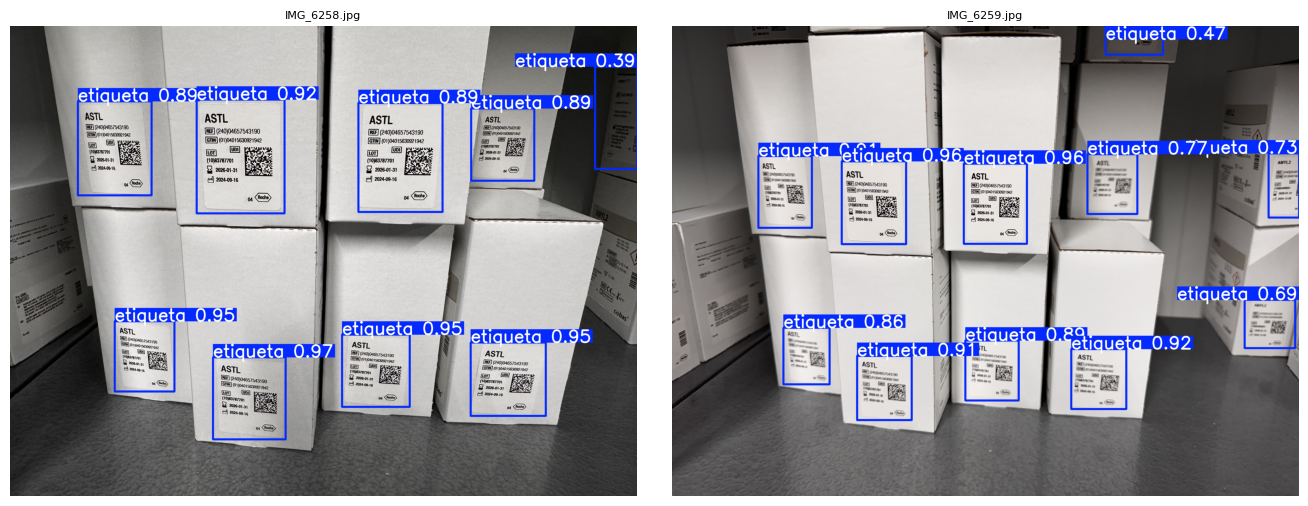

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta donde se guardaron las imágenes predichas
carpeta_resultados = 'runs/detect/predict'
imagenes = sorted([f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))])[75:77]  # Solo 10 primeras

# Parámetros de visualización
imagenes_por_fila = 3
total_imagenes = len(imagenes)
filas = (total_imagenes + imagenes_por_fila - 1) // imagenes_por_fila

plt.figure(figsize=(20, 5 * filas))

for i, nombre in enumerate(imagenes):
    ruta = os.path.join(carpeta_resultados, nombre)
    img = mpimg.imread(ruta)
    plt.subplot(filas, imagenes_por_fila, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()